<a href="https://colab.research.google.com/github/brendanpshea/data-science/blob/main/Data_Science_12_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction To Linear Regression

Welcome to the world of **linear regression**, a fundamental concept in the realm of data science and statistics! Imagine you're a detective trying to unravel mysteries hidden within numbers. Linear regression is one of your most reliable tools in this quest.

In this chapter, we'll explore linear regression using a real-world dataset: the **Boston Housing Dataset**. This dataset, like a treasure map, contains information about various houses in Boston, including their price, the number of rooms, age, and more. By analyzing this data, we can start to understand the relationship between these features and how they affect house prices. We'll close the chapter with a case study on the topic of **racial bias**, which has been raised in the context of both this data set specifically and in the (real) world that it represents. We'll then consider how similar problems can arise in contemporay data sets and practices.

By the end of this chapter, you'll not only understand the basics of linear regression but also how to apply it to real-world data. Let's dive in and uncover the stories hidden in the Boston Housing dataset!


## Loading and Explroring Boston Housing Data
To start, let's load the Boston housing data and take a look at it. A quick look at the data dictionary (available many places online) reveals that the columns are:

```
PRICE - The price of the house.
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million). Historically, this has often been used as a target variable.
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's. This is our "target' variable.
```

Here, our task will be to predict house price based on some of these other variables.

In [ ]:
!pip install pydataset -q # Install required packages
from pydataset import data # Import required modules
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 76.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
initiated datasets repo at: /root/.pydataset/


In [ ]:
# Load the head
boston_df = data('Boston')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Get basic info on the data set
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


We can see here that the dataset comprises 506 entries, indexed from 1 to 506. Each entry corresponds to a different set of housing and area characteristics in Boston.
-   There are 14 columns in total, each representing a different attribute of the housing or area, similar to the ones described in the first five rows of the dataset.
-   The data types (`Dtype`) of these columns are either `float64` or `int64`. Float64 columns (like `crim`, `zn`, `indus`, etc.) represent numeric data with decimal points, whereas Int64 columns (like `chas`, `rad`, `tax`) represent integer values.
-   Importantly, each column has 506 non-null counts, indicating there are no missing values in this dataset. This is crucial for analysis as it means the data is complete, and no imputation or handling of missing data is needed before proceeding with linear regression analysis.

This dataset is well-structured and complete, making it an excellent candidate for regression analysis without the need for preliminary cleaning or data imputation steps. The diverse range of variables, both in type and measurement scale, provides a rich context for exploring linear relationships and building a regression model.

## What is Linear Regression?

**Linear Regression** is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The "linear" in linear regression refers to the fact that this relationship takes the form of a straight line.

In its simplest form, with one independent variable, the linear regression model can be represented as:

$$ y = \beta_0 + \beta_1x + \epsilon $$

Here:
- $y$ is the dependent variable we're trying to predict or explain.
- $x$ is the independent variable we're using for prediction.
- $\beta_0$ is the y-intercept of the regression line.
- $\beta_1$ represents the slope of the regression line, indicating how much \( y \) changes for a unit change in \( x \).
- $\epsilon$ represents the error term, accounting for the variability in \( y \) that cannot be explained by \( x \).

At its core, linear regression is a way to predict a value based on one or more input values. Think of it like trying to draw a straight line through a set of points on a graph so that the line is as close as possible to all the points. This line helps us understand relationships between variables. For example, how does the size of a house (measured in rooms) relate to its price?

- The **Dependent Variable** is what we want to predict. In our case, it's the house price.
- **Independent Variables** are the factors we think might affect our dependent variable. For the Boston Housing data, this could be things like the number of rooms, age of the house, etc.

We'll be using a Python library called **StatsModel** to perform our linear regression analysis. StatsModel is a powerful tool that makes it easier to explore data, estimate statistical models, and perform tests.

After we've created our model, we'll want to know how good it is. For this, we use model metrics like:

- The **R-squared** tells us how well our line fits the data. A higher R-squared value means a better fit.
- The **Coefficients** numbers tell us how much our dependent variable (house price) changes with a one-unit change in our independent variables (like the number of rooms).

## Some Terminology: Models, Fitting, Metrics
A **model** is a mathematical representation that describes the relationship between variables. Data scientists using many "models" in their work, with linear regression being one of the most important ones. In linear regression, the model is  a line that best fits the observed data. In its simplest form, a linear regression model with one independent variable is:

$$y = \beta_0 + \beta_1x$$

as explained above. When we create models we *expect* that they will be imperfect (that is, we will never perfectly predict the dependent variable).

**Fitting** a model means finding the line that best represents the relationship between the independent and dependent variables.

- Technically, it involves calculating the intercept and slope that minimize the difference between the predicted and actual values of the dependent variable.
- This process is known as "minimizing the sum of squared residuals" or the **Ordinary Least Squares (OLS)**.

One we have fit, the model we can **evaluate it** by assessing its effectiveness and accuracy in describing the relationship between variables or in making predictions.

- Key metrics for evaluation include R-squared, the F-statistic, p-values, and others.
- The goal is to understand the model's strengths and limitations in representing the data and its predictive capabilities.

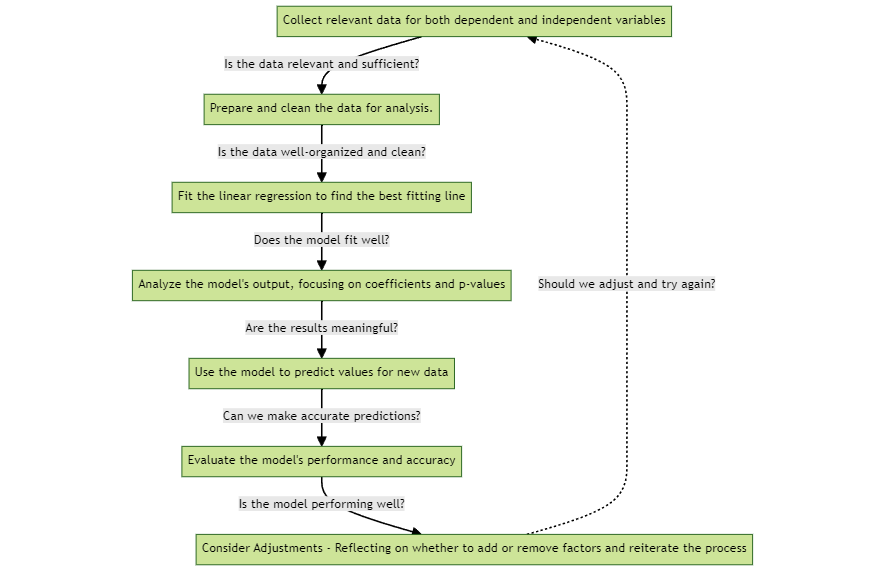

###  Syntax for Creating a Linear Regression Model Using Statsmodels

To create a linear regression model using `statsmodels`, you typically follow these steps:

```python
import statsmodels.api as sm

# Step 1: Prepare your data
# X = ... (independent variables)
# Y = ... (dependent variable)

# Step 2: Add a constant to the independent variables
X = sm.add_constant(X)

# Step 3: Create a model
model = sm.OLS(Y, X)

# Step 4: Fit the model
result = model.fit()

# Step 5: Get the summary of the model
print(result.summary())
```
The steps here are:

1. First, import `statsmodels.api`.
2. Define your independent variables (`X`) and dependent variable (`Y`).
3.`statsmodels` doesn't automatically include the intercept (β0 in the equation), so you need to add a "constant" manually.
4. Create an Ordinary Least Squares (OLS) model. OLS is a type of linear regression.
5. Fit the model to your data.
6. The summary provides detailed results including coefficients, R-squared value, p-values, etc.

### Example: Using Number of Rooms to Predict Price
Let's start with a simple exam, of using room to predict price.

In [ ]:
import statsmodels.api as sm

# Independent variable: Average number of rooms
X = boston_df['rm']

# Dependent variable: Median value of owner-occupied homes
Y = boston_df['medv']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(Y, X)

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           2.49e-74
Time:                        18:35:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

### Making Sense of the Results
So, what does this all mean? While the summary above gives a LOT of information, we can pay attention to a few numbers in particular.

- **R-squared** (and **Adjusted R-Squared**) is a statistical measure that represents the proportion of the variance for the dependent variable (medv) that's explained by the independent variable(s) in the model. An R-squared of 0.484 means that 48.4% of the variance in the median value of homes can be explained by the model.

- The **F-statistic** tests the overall significance of the model. A higher value (471.8 in this case) generally indicates that the model is a better fit to the data. It suggests whether your linear model is better than a model with no independent variables.

- The **coefficient** for `rm` tells us how much the dependent variable (`medv`) is expected to increase when `rm` increases by one unit, holding other variables constant. Similarly, `const` is the y-intercept, the expected value of `medv` when all independent variables are 0.

- **P>|t| (for `rm` < 0.000)** tell us the p-value associated with the coefficient of `rm`. A p-value is the probability of observing any value equal to or more extreme than the observed one, assuming that the null hypothesis (the coefficient is zero) is true. A small p-value (typically < 0.05) indicates that the variable is statistically significant in predicting `medv`.

The results above suggests that the "number of rooms" is, in fact, a pretty good predictor of price.


### Linear Regression in R
In R, we can do linear regression in a very similar way using R's built-in `lm` function.

```r
# Load the necessary library
library(MASS) # Contains the Boston dataset

# Load the Boston Housing dataset
data(Boston)

# Create the linear regression model
# Here, 'medv' is the dependent variable, and 'rm' is the independent variable
fit <- lm(medv ~ rm, data=Boston)

# Print the summary of the model
# This will provide detailed statistics about the model's performance
summary(fit)
```

Here's what the output looks like in R. I've used Python's rpy2 library to run the R code.

In [ ]:
# Emulating R code in a Python environment

import rpy2.robjects as robjects
robjects.r('library(MASS)')
robjects.r('data(Boston)')
robjects.r('fit <- lm(medv ~ rm, data=Boston)')
print(robjects.r('summary(fit)'))



Call:
lm(formula = medv ~ rm, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -34.671      2.650  -13.08   <2e-16 ***
rm             9.102      0.419   21.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.616 on 504 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4825 
F-statistic: 471.8 on 1 and 504 DF,  p-value: < 2.2e-16




### Exercise: Regression
Run a linear regression using a variable OTHER than rooms. (I've included Python starter code below, but you can also use R, using my code from above).

In [ ]:

# Independent variable: Someting other than rooms!
# X = boston_df['rm']
# TODO


# Dependent variable: Median value of owner-occupied homes
Y = boston_df['medv']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(Y, X)

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           2.49e-74
Time:                        18:35:21   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

### Question: Making Sense of Regression
Now, explain the results using the concepts we learned above. How does your model compare to the one that used rooms?

### My Answer:

## What is Multiple Regression?

**Multiple regression** is an extension of linear regression, where instead of using one, we use multiple independent variables to predict a dependent variable. It's like adding more ingredients into the mix to understand a recipe better.

- In **simple linear regression**, we have one independent variable predicting a dependent variable. The formula looks like $ y = \beta_0 + \beta_1x $.
- In **multiple regression**, the formula expands to include multiple independent variables. It looks like

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$ where:
   - $ y $ is the dependent variable.
   - $x_1, x_2, ..., x_n$ are the independent variables.
   - $\beta_0$ is the intercept.
   - $\beta_1, \beta_2, ..., \beta_n$ are the coefficients for each independent variable.

Multiple regression can, in the right circumstances, provide a number of benefits.

1. By including more variables, multiple regression can provide a more accurate and nuanced understanding of the relationships affecting the dependent variable.
2. It allows us to explore and model more complex relationships that simple linear regression can't handle.
3. Multiple regression helps in controlling for **confounding variables**, isolating the effect of each independent variable on the dependent variable.

Multiple regression is widely used in fields like economics, social sciences, biology, and engineering, where the outcome is influenced by several factors. It provides a more comprehensive view of the dynamics at play, making it a powerful tool for prediction and analysis.


### Example: Multiple Regression
Let's predict the median value of owner-occupied homes (`medv) using two independent variables: the average number of rooms (`rm`) and the percentage of lower status population (`lstat`).

In [ ]:
import statsmodels.api as sm

# Independent variables: 'rm' and 'lstat'
X = boston_df[['rm', 'lstat']]

# Dependent variable: 'medv'
Y = boston_df['medv']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create a multiple linear regression model
model = sm.OLS(Y, X)

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          7.01e-112
Time:                        18:35:21   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

The results here--in particular, the higher **R-squared** suggests that we are doing a somewhat better job than before. You'll also notice that we now have *multiple* coefficients (for both `rm` and `lstat`), each of which have their own assocated p-values.

So, more variable is better, right? In this case, it is probably is. However, we need to be *very* careful about this. As it turns out, adding more and more variables can lead to overfitting, one of the central problems of data science.

### Example: Multiple Regression in R
To do multiple regression in R, you'll again use `lm`

```r
lm(formula, data = data)
```
where:

- `formula` is a formula specifying the dependent variable (y) and the independent variables (x). For example, `formula = y ~ x1 + x2 + x3` would specify that y is the dependent variable and x1, x2, and x3 are the independent variables.
- `data` is an optional argument that specifies the data frame containing the variables. If not specified, the data frame in the current environment will be used.

In our case, the code is

In [ ]:
# How to run multiple regression in R
robjects.r('fit <- lm(medv ~ rm + lstat, data=Boston)')
print(robjects.r('summary(fit)'))


Call:
lm(formula = medv ~ rm + lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.076  -3.516  -1.010   1.909  28.131 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.35827    3.17283  -0.428    0.669    
rm           5.09479    0.44447  11.463   <2e-16 ***
lstat       -0.64236    0.04373 -14.689   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.54 on 503 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6371 
F-statistic: 444.3 on 2 and 503 DF,  p-value: < 2.2e-16




## What is Overfitting? How Can I Avoid it?

Overfitting is a common and significant issue in data science and machine learning, reflecting the classic problem of induction in philosophy. It occurs when a model is too closely aligned to the specificities of the training data, capturing noise and random fluctuations as if they were meaningful patterns. This leads to a model that performs well on the training data but poorly on new, unseen data.

For example, onsider a model predicting house prices in the Boston Housing dataset. If the model is overly complex, it might start picking up on random variations in the training data (like a minor fluctuation in crime rate in a specific year) and treat these as significant, predictive features. Such a model might perform exceptionally well on the training dataset but fail to generalize to new data.

### Common Ways to Alleviate Overfitting
There are a number of common techniques for addressing overfitting (and, in fact, these tend to major topics in more advanced data science classes).

1. **Simplifying the Model--** Sometimes, less is more. Reducing the complexity of the model, like using fewer variables in a regression, can help.
2. **Cross-Validation--** This involves splitting the dataset into several smaller sets, using some for training and some for testing. By rotating which sets are used for training and testing, you can get a better sense of how the model performs on different data samples.
3. **Regularization--** Techniques like Lasso and Ridge regression add a penalty for more complex models, effectively simplifying the model in a controlled way.
4. **Pruning in Decision Trees--** In tree-based models, removing sections of the tree that provide little predictive power can prevent the model from being overly complex.

### A Tough Problem with No Perfect Solution
It should be empahsed, however, that there is no "perfect" solution to the problem of overfitting, and it is a challenge that must be confronted for each data set.

- The challenge is finding the right balance between a model that is too simple (underfitting) and one that is too complex (overfitting).
-  Every dataset and problem is unique, and what works for one may not work for another. It requires experimentation, intuition, and a deep understanding of the data.
-  Avoiding overfitting is not a one-time fix but a continual process of model evaluation and adjustment.

In the end, overfitting is a tough problem with no perfect solution. It represents a fundamental challenge in data science, where the goal is to create models that generalize well to new, unseen data, rather than just performing well on the data they were trained on.


## Glossary: Linear Regression
| Term | Definition |
| --- | --- |
| Statistical Model | A mathematical representation of the relationships among different variables in a dataset. It is used to make predictions or inferences about the data, relying on probability theory to account for randomness and uncertainty in these relationships. |
| Fit (a model) | The process of adjusting a statistical model so that it best captures the relationship between variables in a given dataset. This involves estimating the parameters of the model to minimize the difference between the observed data and the predictions made by the model. |
| Linear Regression | A method for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It assumes a straight-line relationship between the variables. |
| Dependent Variable | The variable in a statistical model that is being predicted or explained. It is the outcome of interest and is dependent on the influence of the independent variables. |
| Independent Variable | A variable in a statistical model that is presumed to influence or predict the dependent variable. It is not affected by other variables in the model and is used to explain variations in the dependent variable. |
| Coefficient (Linear Regression) | A numerical value in linear regression that represents the degree and direction of the relationship between an independent variable and the dependent variable. It quantifies the change in the dependent variable for a one-unit change in the independent variable, holding other variables constant. |
| P-value (of coefficient) | A measure used to assess the strength of evidence against the null hypothesis. In the context of a coefficient in linear regression, it tests the hypothesis that the coefficient is significantly different from zero. A low p-value suggests that the corresponding independent variable is statistically significant in predicting the dependent variable. |
| R-squared | A statistical measure in regression analysis that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data. |
| F-statistic | A value used to test the overall significance of a regression model. It compares the model with a null model that assumes no relationship between the independent and dependent variables. A higher F-statistic suggests that the regression model provides a better fit to the data than the null model. |
| P-value (of F-statistic) | The probability of observing a value of the F-statistic as extreme as, or more extreme than, the observed value, assuming the null hypothesis is true. It helps determine whether the overall regression model is statistically significant. |
| Multiple Regression | An extension of linear regression that involves two or more independent variables. It models the relationship between the dependent variable and multiple independent variables, allowing for the examination of complex relationships in data. |

## Exercise: Build the Best Multiple Regression Model for Boston Housing Data

Create a multiple regression model using the Boston Housing dataset to predict the median value of owner-occupied homes (`medv`). Your goal is to maximize the R-squared value, which measures the proportion of variance in the dependent variable that is predictable from the independent variables.

Start by Using Python and `statsmodels`, create an initial multiple regression model. Begin with a few variables that you think might strongly predict `medv`. I've included starter code below. (If you'd rather use R, you can find code above).

### Your Task
Based on the initial model's summary, begin refining your model. Look at the p-values of the coefficients to determine their significance. A high p-value (> 0.05) suggests that the variable might not be a good predictor. Consider adding, removing, or replacing variables to improve the model. Think about potential interactions between variables and whether adding polynomial terms might help.
    -   Repeat the process of refining and fitting the model. Each time, pay attention to the R-squared value and aim to increase it.
    -   Be cautious of overfitting. Adding too many variables can make the model overly complex and less generalizable.

Once you have a model with a satisfactorily high R-squared value, evaluate it critically. Ask yourself:
        -   Does the model make logical sense?
        -   Are there any variables that don't seem to belong?
        -   How might this model perform on unseen data?


Please provide a written summary of how you created your model, and evaluating its performance.

In [ ]:
# Starter code - Python
# Independent variables: You'll want to change these!
X = boston_df[['rm', 'lstat']]

# Dependent variable: 'medv'
Y = boston_df['medv']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create a multiple linear regression model
model = sm.OLS(Y, X)

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          7.01e-112
Time:                        18:35:21   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

## Case Study: Race and Housing Prices

Here, we will explore the complex and often delicate interplay between racial demographics and housing prices within the context of the Boston Housing dataset. Our goal is to shed light on how these factors might be interrelated, acknowledging the broader societal and historical context that shapes these dynamics. We'll also talk about some flaws related to the dataset -- Boston Housing Data -- that we've been using so far in this chapter.

The topic of race and housing prices is deeply intertwined with historical, social, and economic narratives. In many urban areas, housing markets have been influenced by a variety of factors including socio-economic status, urban planning decisions, and, notably, racial demographics. This has led to phenomena such as segregation, gentrification, and disparate living conditions across different communities.

There has been lots of good, detailed research on this, and the goal here is not to reproduce this. Instead, we just want to show that race does matter, and that it *matters* how data scientists treat considerations of race (and of gender, religion, social class, and other common sources of bias) carefully.

### A Simple Model Without Race
To begin with, let's construct a simple modeling of housing prices that does NOT consider race. Instead, we will consider only four factors:

- The number of rooms the house has
- The crime rate of the surrounding areas
- THe percent of people who are low income
- The age of the house

Let's run this model and see what the results are. (I'm using R to keep things a little simpler)

In [ ]:
robjects.r('fit <- lm(medv ~ crim + lstat + rm + age, data=Boston)')
print(robjects.r('summary(fit)'))


Call:
lm(formula = medv ~ crim + lstat + rm + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.105  -3.501  -1.143   1.968  28.180 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.34910    3.17079  -0.741  0.45913    
crim        -0.10639    0.03216  -3.308  0.00101 ** 
lstat       -0.61258    0.05642 -10.857  < 2e-16 ***
rm           5.11625    0.45083  11.349  < 2e-16 ***
age          0.01259    0.01116   1.129  0.25950    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.488 on 501 degrees of freedom
Multiple R-squared:  0.6468,	Adjusted R-squared:  0.6439 
F-statistic: 229.3 on 4 and 501 DF,  p-value: < 2.2e-16




You'll see a few things here (which are hopefully familiar from our above discussion).

- **Coefficients** in linear regression represent the expected change in the dependent variable (in this case, `medv`, median value of homes) for a one-unit change in an independent variable, assuming all other variables are held constant.  Example: The coefficient for `rm` is 5.11625. This means for each additional room, the median value of homes (`medv`) is expected to increase by about 5.12 units (thousands of dollars, in this context), assuming other factors remain constant.

- **P-values** tell us about the statistical significance of each coefficient. A low p-value (usually less than 0.05) suggests that the variable is a significant predictor of the dependent variable.  -   Example: The p-value for `crim` is 0.00101, which is less than 0.05. This indicates that the crime rate (`crim`) is a statistically significant predictor of the median value of homes.

-  The **F-statistic** tests the overall significance of the regression model. It checks whether at least one predictor variable has a non-zero coefficient. A higher value (like 229.3 in this case) usually indicates that the model is more significant and likely to be a better fit than a model with no independent variables. A very low **p-value for the F-statistic** (< 2.2e-16, as in this case) suggests the model as a whole is statistically significant.

- **R-squared** is a measure of how well the independent variables explain the variance in the dependent variable. It ranges from 0 to 1.  An R-squared of 0.6468 means that about 64.68% of the variability in `medv` is explained by the variables `crim`, `lstat`, `rm`, and `age`. The closer this value is to 1, the better the model explains the dependent variable. The **Adjusted R-squared** is similar to R-squared but adjusts for the number of variables in the model. It's more reliable for models with multiple predictors.

### A Model With Race
Now, let's see what happens when we include race into this model. That is, we want to find out what happens to the value of a home when:

1. The crime rate, poverty rate, number of rooms, and age of house are all held fixed.
2. The factor that changes is the proportion of African Americans who live in the surrounding community.

We can specify this model as follows:

In [ ]:
robjects.r('fit <- lm(medv ~ crim + lstat + rm + age + black, data=Boston)')
print(robjects.r('summary(fit)'))


Call:
lm(formula = medv ~ crim + lstat + rm + age + black, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.209  -3.405  -1.163   1.923  28.521 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.755833   3.499833  -2.216 0.027137 *  
crim        -0.077509   0.032872  -2.358 0.018763 *  
lstat       -0.572063   0.057006 -10.035  < 2e-16 ***
rm           5.282908   0.448474  11.780  < 2e-16 ***
age          0.013451   0.011037   1.219 0.223512    
black        0.010327   0.002967   3.481 0.000544 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.428 on 500 degrees of freedom
Multiple R-squared:  0.6551,	Adjusted R-squared:  0.6517 
F-statistic: 189.9 on 5 and 500 DF,  p-value: < 2.2e-16




Incorporating the 'black' variable (representing the proportion of Black residents) into the Boston Housing dataset's regression model brings some interesting changes and implications. Let's analyze what these changes mean, especially in terms of the effect of race on house prices. We see a few changes.

1. A new coefficient for 'black' appears: 0.010327. This suggests that with each unit increase in the 'black' variable, the median value of homes (`medv`) increases by 0.010327 units, holding other variables constant.
2. The p-value for 'black' is 0.000544, which is less than 0.05. This indicates that the proportion of Black residents is a statistically significant predictor of the median value of homes.
3.  The Multiple R-Squared increased to 0.6551 from 0.6468. This implies that the model now explains approximately 65.51% of the variability in `medv`, an improvement over the previous model.
4.  Adjusted R-Squared also increased to 0.6517, suggesting that the inclusion of 'black' improves the model's explanatory power, even after adjusting for the number of predictors.
5. The F-statistic decreased slightly to 189.9, but its p-value remains highly significant, indicating the model is statistically significant.

The significant coefficient and low p-value for 'black' imply that race, as represented in this dataset, plays a meaningful role in explaining housing prices in Boston. This aligns with broader societal observations about the impact of racial demographics on housing markets.

More surprisingly, the positive coefficient for 'black' suggests a positive correlation with house prices. This might seem counterintuitive given the historical contexts of racial segregation and discrimination impacting housing prices. It's important to interpret this with caution and consider other socio-economic factors that might be influencing this relationship. (See next section for cavates). The addition of 'black' affects other coefficients slightly, indicating the complex interplay between these variables. It's a reminder that in real-world data, variables can interact in multifaceted ways.

### Criticisms of the Boston Housing Data
The Boston Housing dataset, a staple in regression analysis, has been subject to significant scrutiny, particularly in its handling and representation of race-related data. A key criticism lies in its oversimplified portrayal of race. The dataset's `black` variable, calculated as `1000(Bk - 0.63)^2`, where Bk represents the proportion of Black residents, reduces complex racial dynamics to a single numerical figure. This not only fails to capture the nuances and multifaceted nature of racial diversity but also overlooks the intersectionality of race with other social factors.

Moreover, the historical context of the dataset, originating from studies in the 1970s, embeds it within a time when racial discrimination in housing was more overt and even legally sanctioned in some regions. This background is crucial as it can color the data with systemic biases and social injustices of that era, making modern interpretations potentially reflective of these outdated and unjust dynamics.

This leads to another critical point: the potential for misinterpretation. For instance, interpreting a positive coefficient for the `black` variable in predictive models might be misleading, especially since the variable has been transformed by the original study's authors. Such a result could be misconstrued as indicating a positive impact of a higher Black population on housing prices, thus ignoring the historical and ongoing realities of racial discrimination in the housing market.

Ethical considerations also come to the forefront when using this dataset. The inclusion of race as a predictive variable in models not only raises questions about the perpetuation of stereotypes and biases but also about the overall appropriateness and necessity of its use in statistical analysis. Data scientists bear an ethical responsibility to ensure that their use of data does not inadvertently reinforce existing societal biases or stereotypes. For example, it is NOT appropriate to use the racial composition of a neighborhood when deciding whether to give a bank customer a home loan (as was historically done).

So, while the Boston Housing dataset serves as a valuable educational and research tool in data science, it requires a level of careful, critical, and ethically aware engagement, particularly concerning race-related variables. Users must be cognizant of the dataset's limitations, its historical context, and the broader implications of their analyses. It underscores the need for a responsible and context-aware approach in the utilization of data, especially when dealing with sensitive and complex social factors.


### Recognizing and Combating Bias in Data Science

In the evolving field of data science, recognizing and combating bias is a crucial responsibility. Bias in data can lead to skewed results and have far-reaching consequences, particularly in areas like machine learning, healthcare, finance, and social media algorithms.

#### Recognizing Bias

The first step in combating bias is recognizing it. This starts with a deep understanding of the data sources. For instance, if a healthcare dataset predominantly includes data from urban hospitals, it may not accurately represent rural health trends, leading to biased healthcare predictions. Similarly, facial recognition technologies have shown biases based on the data they were trained on, which historically had underrepresentation of certain racial groups.

Conducting thorough exploratory data analysis is another critical step. This involves looking for patterns or anomalies that might suggest bias, such as checking if a dataset used for credit scoring unintentionally excludes certain demographic groups, which could lead to unfair credit decisions.

Being informed about societal contexts is essential, especially when dealing with human demographics. For example, if a job recommendation algorithm is trained on historical hiring data, it might perpetuate existing biases against certain groups unless the historical context of inequality is taken into account.

#### Combating Bias

To combat bias, ensuring diverse and inclusive data is key. In job recommendation algorithms, for instance, it’s important to include a wide range of demographic backgrounds to avoid reinforcing existing societal biases. Similarly, in natural language processing, algorithms trained on diverse linguistic data can better understand and serve a broader range of users.

Adhering to ethical frameworks and guidelines is vital. Regular ethical audits of both the data and algorithms can help identify and address potential biases. For instance, banks employing algorithms for loan approval should regularly audit these algorithms to ensure they aren't unintentionally discriminating against certain groups.

Algorithmic transparency is crucial for identifying how decisions are made. Transparent models in social media algorithms can help understand why certain content is promoted, making it easier to identify and correct biases.

Collaboration with domain experts, especially in sociology, psychology, and ethics, can provide insights into potential biases in datasets. For instance, collaborating with sociologists can help identify societal trends that might impact data on consumer behaviors.

Finally, combating bias is an ongoing process. Data scientists should continuously update models and algorithms to adapt to new data and changing societal norms. For example, as social norms around gender identity evolve, datasets and algorithms in marketing and retail must adapt to these changes to remain relevant and unbiased.

In conclusion, recognizing and combating bias in data science requires a combination of technical diligence, ethical considerations, and an understanding of broader societal contexts. By employing these strategies, data scientists can ensure that their work contributes to fair and equitable outcomes in a world increasingly driven by data.


### Questions
1.  How do you think different variables in the Boston Housing dataset, such as the number of rooms (`rm`), crime rate (`crim`), and the proportion of Black residents (`black`), impact the median value of homes (`medv`)? Discuss why each variable might be significant.

2.  Considering the `black` variable in the dataset, what are the ethical implications of including race as a factor in housing price analysis? Discuss the potential benefits and drawbacks of using such sensitive demographic data in statistical models.

3.  The Boston Housing dataset was compiled in the 1970s. How might the historical context of that time have influenced the data, and why is it important to consider this context when analyzing and interpreting the data today?

4.  How can data science be used to highlight or address social issues, such as inequality in housing? Discuss the responsibility of data scientists in ensuring their work benefits society and does not perpetuate biases.


### My Answers
1.

2.

3.

4.